In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Cargar los datos
df_respuestas = pd.read_csv('Base Datos - Tesis/t_respuestasnom35.csv', engine='python')
df_empleados = pd.read_csv('Base Datos - Tesis/t_empleadosnom35.csv', engine='python')

# Descubrir y Visualizar los datos para obtener información

In [3]:
#Mostrar las primeras filas
df_respuestas.head()

,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date
0,1,1,1,2,2019-06-10
1,2,1,2,2,2019-06-10
2,3,1,3,2,2019-06-10
3,4,1,4,2,2019-06-10
4,5,1,5,2,2019-06-10


In [4]:
#Mostrar las columnas
df_respuestas.columns.values

array(['Id_respuesta', 'Id_empleado_nom35', 'Id_res_nom35', 'respuesta',
       'date'], dtype=object)

In [5]:
#Mostrar el numero de filas y columnas
df_respuestas.shape

(1265984, 5)

In [6]:
#Mostrar el tipo de variables
df_respuestas.dtypes

Id_respuesta          int64
Id_empleado_nom35     int64
Id_res_nom35          int64
respuesta             int64
date                 object
dtype: object

In [7]:
#Visualizar los distintos tipos de respuestas de la norma 035 dada por empleados
df_respuestas['respuesta'].value_counts()

0    472517
2    317130
1    274435
3    104420
4     97481
6         1
Name: respuesta, dtype: int64

# Visualizacion de los datos de los Empleados

In [8]:
#Mostrar las primeras filas
df_empleados.head

<bound method NDFrame.head of        Id_Empleado                                             Nombre  \
0                1                                      Miguel Orozco   
1                2                                           Ejemplo1   
2                3                                            WangTsu   
3                4                                  Rodrigo Padilla 2   
4                5                                      Miriam Carlos   
...            ...                                                ...   
21119        21247  cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...   
21120        21248  c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...   
21121        21249  c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...   
21122        21250  f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...   
21123        21251  83bd54fe16181d08e658a5cb0b4ecc5ca936d67e75d37f...   

                                                   Email        Edad  \
0      e3b0c44298fc1c

In [9]:
#Mostrar las columnas
df_empleados.columns.values

array(['Id_Empleado', 'Nombre', 'Email', 'Edad', 'Genero', 'EstadoCivil',
       'NivelEstudios', 'Ocupacion', 'Departamento', 'TipoPuesto',
       'TipoContratacion', 'TipoPersonal', 'TipoJornada', 'Rotacion',
       'ExperienciaActual', 'ExperienciaTotal', 'PIN', 'Folio',
       'FechaRegistro', 'NombreSucursal', 'CPSucursal', 'Pagado', 'Nota'],
      dtype=object)

In [10]:
#Mostrar el numero de filas y columnas
df_empleados.shape

(21124, 23)

In [11]:
#Mostrar el tipo de variables
df_empleados.dtypes

Id_Empleado           int64
Nombre               object
Email                object
Edad                 object
Genero               object
EstadoCivil          object
NivelEstudios        object
Ocupacion            object
Departamento         object
TipoPuesto           object
TipoContratacion     object
TipoPersonal         object
TipoJornada          object
Rotacion             object
ExperienciaActual    object
ExperienciaTotal     object
PIN                  object
Folio                object
FechaRegistro        object
NombreSucursal       object
CPSucursal           object
Pagado               object
Nota                 object
dtype: object

# Preparar los datos para los algoritmos de Machine Learning

In [12]:
df_filtrado_respuestas=df_respuestas.drop(df_respuestas.index[df_respuestas.Id_empleado_nom35 <= 26], axis=0)
df_filtrado_empleados=df_empleados.drop(df_empleados.index[df_empleados.Id_Empleado <= 26], axis=0)

df_r=pd.DataFrame(df_filtrado_respuestas)
df_e=pd.DataFrame(df_filtrado_empleados)
df_e2=df_e.loc[:, ['Id_Empleado','Genero','EstadoCivil','NivelEstudios','Ocupacion','Departamento','TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_r2=df_r.loc[:, :]

In [13]:
#Para mostrar todos los datos de una tabla
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [14]:
df_filtrado_respuestas

,Id_respuesta,Id_empleado_nom35,Id_res_nom35,respuesta,date
1007,1008,28,1,0,2019-07-08
1008,1009,28,2,2,2019-07-08
1009,1010,28,3,0,2019-07-08
1010,1011,28,4,2,2019-07-08
1011,1012,28,5,2,2019-07-08
...,...,...,...,...,...
1265979,1268876,21251,152,2,2021-04-07
1265980,1268877,21251,153,0,2021-04-07
1265981,1268878,21251,154,0,2021-04-07
1265982,1268879,21251,155,3,2021-04-07


In [15]:
df_filtrado_empleados

,Id_Empleado,Nombre,Email,Edad,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,...,Rotacion,ExperienciaActual,ExperienciaTotal,PIN,Folio,FechaRegistro,NombreSucursal,CPSucursal,Pagado,Nota
25,27,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,64805e8771571d97e53c2bba8d6d29cab52ce2a30274aa...,1989-02-17,Masculino,Casado,Maestria,informatica,informatica,profesional,...,SI,1A4A,10A14A,123abc,NaN,NaN,NaN,NaN,Gratis,NaN
26,29,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,9bab180b309ff8d9e3058c74a0d8f101d35b61d9041319...,1995-08-17,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,...,NO,1A4A,6M1A,8u3rq,NaN,NaN,NaN,NaN,Gratis,NaN
27,30,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,76ee4ab8668be0081c2e3a4fbf6b2f8f7642aedecbcfa1...,1967-03-20,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,...,SI,Menos6M,Menos6M,ypa5i,NaN,NaN,NaN,NaN,Gratis,NaN
28,31,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,b0e186d06d48670968a9c48267b75a69c3f2894147e8e0...,1979-11-03,Masculino,Soltero,Licenciatura,otros,otros,otro,...,SI,5A9A,5A9A,8bwyp,NaN,NaN,NaN,NaN,Gratis,NaN
29,44,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,733c498ffe3e81d930968947764559d5d0f2a00d8c125e...,1964-10-20,Femenino,Casado,Licenciatura,direccion,direccion,otro,...,NO,15A19A,20A24A,vinxd,NaN,NaN,NaN,NaN,Gratis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...,cb1b15500d18f8f93acb06e3b3779c0754811039a2c169...,1994-08-20,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,1A4A,1A4A,1h0gp,DteEt9mxg4,2021-04-06 15:03:43,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si
21120,21248,c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...,c8ca86bcb1b19554526877d3e8d8e3ddabba11144f35a9...,1985-12-07,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,6M1A,6M1A,1h0gp,Vv3CKPIUXs,2021-04-06 15:18:27,CEPILLOS Y PRODUCTOS DE ASEO S.A DE C.V BODEGA 7,09850,NaN,Si
21121,21249,c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...,c7ce4592cd5bfb617c911352d05f7d1550a0cf5ba6f53d...,1984-12-13,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,6M1A,6M1A,1h0gp,8P326qFHD0,2021-04-07 10:57:14,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si
21122,21250,f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...,f860de2f24e1f55815a1e53c479d19d781712306cbf4cf...,1996-01-19,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,...,NO,Menos6M,1A4A,1h0gp,P1dTggyf7E,2021-04-07 12:17:29,Cepillos y productos de aseo S.A DE C.V,09850,NaN,Si


In [17]:
#DataFrame para guardar las modificaciones al anterior
#df_e_definitivo = df_e.loc[:, ['TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e2

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,Masculino,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,Masculino,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,Femenino,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


# Saber los distintos datos de cada columna

In [18]:
df_e2['EstadoCivil'].value_counts()

Soltero       9113
Casado        8353
UnionLibre    2816
Divorciado     699
Viudo          118
Name: EstadoCivil, dtype: int64

In [19]:
df_e2['NivelEstudios'].value_counts()

Licenciatura       7992
Secundaria         3172
Preparatoria       3070
Bachillerato       2166
TecnicoSuperior    1707
SinFormacion       1395
Maestria           1044
Primaria            501
Doctorado            52
Name: NivelEstudios, dtype: int64

In [20]:
df_e2['Ocupacion'].value_counts()

produccion                     2609
otros                          2233
ventas                         1560
direccion                      1548
administracion                 1326
                               ... 
700GerenciaGeneral                1
777Saltillo                       1
AssetReliabilityPerformance       1
TechnicalServices                 1
MEJORACONTINUA                    1
Name: Ocupacion, Length: 308, dtype: int64

In [21]:
df_e2['Departamento'].value_counts()

produccion                     2609
otros                          2233
ventas                         1560
direccion                      1548
administracion                 1326
                               ... 
700GerenciaGeneral                1
777Saltillo                       1
AssetReliabilityPerformance       1
TechnicalServices                 1
MEJORACONTINUA                    1
Name: Departamento, Length: 308, dtype: int64

In [22]:
df_e2['TipoPuesto'].value_counts()

operativo                          6552
profesional                        2674
otro                               2508
gerente                            1207
supervisor                         1197
                                   ... 
GerentedeRecursosHumanosExterno       1
SUBDIRECTORIFRS9                      1
EjecutivodeImplementaciones           1
GTIFRS69                              1
VELADOR                               1
Name: TipoPuesto, Length: 1204, dtype: int64

In [23]:
df_e2['TipoContratacion'].value_counts()

tiempoindeterminado    16652
porObraoProyecto        2113
tiempodeterminado       1393
otro                     689
honorarios               252
Name: TipoContratacion, dtype: int64

In [24]:
df_e2['TipoPersonal'].value_counts()

confianza        8497
ninguno          6360
sindicalizado    6242
Name: TipoPersonal, dtype: int64

In [25]:
df_e2['TipoJornada'].value_counts()

diurno      16587
mixto        4035
nocturno      477
Name: TipoJornada, dtype: int64

In [26]:
df_e2['Rotacion'].value_counts()

NO    13750
SI     7349
Name: Rotacion, dtype: int64

In [27]:
df_e2['ExperienciaActual'].value_counts()

1A4A       7959
Menos6M    3969
5A9A       3312
6M1A       2974
10A14A     1451
15A19A      692
20A24A      387
Mas25A      355
Name: ExperienciaActual, dtype: int64

In [28]:
#DataFrame para guardar las modificaciones al anterior de los atribuos que si merecen la pena cambiar sus valores
df_e = df_e.loc[:, ['Id_Empleado','Genero','EstadoCivil','NivelEstudios','Ocupacion','Departamento','TipoPuesto','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,Masculino,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,Masculino,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,Masculino,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,Masculino,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,Femenino,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,Femenino,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,Femenino,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,Femenino,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [29]:
#El 1 representa al genero masculino y el 0 al genero femenino
gen_ = {'Masculino':1, 'Femenino':0}
df_e['Genero'] = df_e['Genero'].map(gen_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,Maestria,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,Licenciatura,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,SinFormacion,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,Licenciatura,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,0,Casado,Licenciatura,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,Primaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,Secundaria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,Preparatoria,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [30]:
estudio_ = {'Licenciatura':9, 'Secundaria':8, 'Preparatoria':7, 'Bachillerato':6, 'TecnicoSuperior':5, 'SinFormacion':4, 'Maestria':3, 'Primaria':2, 'Doctorado':1}
df_e['NivelEstudios'] = df_e['NivelEstudios'].map(estudio_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,tiempoindeterminado,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,tiempoindeterminado,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,porObraoProyecto,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,tiempoindeterminado,ninguno,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,otro,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,tiempoindeterminado,ninguno,diurno,NO,Menos6M


In [31]:
contratacion_ = {'tiempoindeterminado':5,'porObraoProyecto':4,'tiempodeterminado':3,'otro':2,'honorarios':1}
df_e['TipoContratacion'] = df_e['TipoContratacion'].map(contratacion_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,sindicalizado,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,sindicalizado,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,sindicalizado,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,ninguno,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,confianza,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,ninguno,diurno,NO,Menos6M


In [32]:
tipoPersonal_ = {'confianza':3,'ninguno':2,'sindicalizado':1}
df_e['TipoPersonal'] = df_e['TipoPersonal'].map(tipoPersonal_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,diurno,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,diurno,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,diurno,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,diurno,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,diurno,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,diurno,NO,Menos6M


In [33]:
tipoJornada_ = {'diurno':3,'mixto':2,'nocturno':1}
df_e['TipoJornada'] = df_e['TipoJornada'].map(tipoJornada_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,SI,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,NO,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,SI,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,3,SI,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,NO,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,NO,Menos6M


In [34]:
rotacion_ = {'NO':2,'SI':1}
df_e['Rotacion'] = df_e['Rotacion'].map(rotacion_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,1,1A4A
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,2,1A4A
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,1,Menos6M
28,31,1,Soltero,9,otros,otros,otro,5,2,3,1,5A9A
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,2,15A19A
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,1A4A
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,6M1A
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,6M1A
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,Menos6M


In [35]:
experiencia_ = {'1A4A':8,'Menos6M':7,'5A9A':6,'6M1A':5,'10A14A':4,'15A19A':3,'20A24A':2,'Mas25A':1}
df_e['ExperienciaActual'] = df_e['ExperienciaActual'].map(experiencia_)
df_e

,Id_Empleado,Genero,EstadoCivil,NivelEstudios,Ocupacion,Departamento,TipoPuesto,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,27,1,Casado,3,informatica,informatica,profesional,5,1,3,1,8
26,29,1,Soltero,9,innovacion,innovacion,gerente,5,1,3,2,8
27,30,1,Soltero,4,direccion,direccion,operativo,4,1,3,1,7
28,31,1,Soltero,9,otros,otros,otro,5,2,3,1,6
29,44,0,Casado,9,direccion,direccion,otro,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,21247,0,UnionLibre,2,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,8
21120,21248,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21121,21249,0,UnionLibre,8,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,5
21122,21250,0,Soltero,7,PRODUCCIONENPROCESO,PRODUCCIONENPROCESO,AYUDANTEGENERALPARAPRODUCCIONENPROCESO,5,2,3,2,7


In [40]:
#Se deja solo los atributos de la tabla que si se pudieron hacer numeros sin problemas
df_e = df_e.loc[:, ['Genero','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']]
df_e

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,1,3,5,1,3,1,8
26,1,9,5,1,3,2,8
27,1,4,4,1,3,1,7
28,1,9,5,2,3,1,6
29,0,9,2,3,3,2,3
...,...,...,...,...,...,...,...
21119,0,2,5,2,3,2,8
21120,0,8,5,2,3,2,5
21121,0,8,5,2,3,2,5
21122,0,7,5,2,3,2,7


In [36]:
count=0

#Saber la cantidad de preguntas que respondio cada persona
df_r['Id_empleado_nom35'].value_counts()

15615    136
625      136
5138     118
312      118
5233     115
        ... 
2688      40
2747      40
2753      40
2760      40
28        40
Name: Id_empleado_nom35, Length: 21124, dtype: int64

Hubo personas que solo tuvieron que contestar 40 preguntas, pero huvo el caso de algunos que fue necesario responder hasta 136 preguntas. Esto se debe porque a la hora de responde la norma 035 y al terminar una seccion te dice que dado algunas respuestas anteriores podras finalizar ya las preguntas o deberas seguir contestandolas

In [86]:
#Copia
df_e1 = df_e

In [87]:
df_prueba = df_r
df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != 29], axis=0)
df_e1.loc[27, 'Resultado']=df_prueba['respuesta'].sum()
df_e1

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado
25,1,3,5,1,3,1,8,92.0
26,1,9,5,1,3,2,8,54.0
27,1,4,4,1,3,1,7,53.0
28,1,9,5,2,3,1,6,NaN
29,0,9,2,3,3,2,3,NaN
...,...,...,...,...,...,...,...,...
21119,0,2,5,2,3,2,8,NaN
21120,0,8,5,2,3,2,5,NaN
21121,0,8,5,2,3,2,5,NaN
21122,0,7,5,2,3,2,7,NaN


In [88]:
df_prueba = df_r
df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != 28], axis=0)
df_e1.loc[26, 'Resultado']=df_prueba['respuesta'].sum()
df_e1

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual,Resultado
25,1,3,5,1,3,1,8,92.0
26,1,9,5,1,3,2,8,54.0
27,1,4,4,1,3,1,7,53.0
28,1,9,5,2,3,1,6,NaN
29,0,9,2,3,3,2,3,NaN
...,...,...,...,...,...,...,...,...
21119,0,2,5,2,3,2,8,NaN
21120,0,8,5,2,3,2,5,NaN
21121,0,8,5,2,3,2,5,NaN
21122,0,7,5,2,3,2,7,NaN


In [89]:
#Antes de compilar saber cuantos personas contestaron la encuesta, saber la cantidad de numeros distintos
"""
cont1=25
cont2=27
for i in range(0,21124):
    df_prueba = df_r
    df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != cont2], axis=0)
    df_e1.loc[contador, 'Resultado']=df_prueba['respuesta'].sum()
    count+=1
    cont1+=1
    cont2+=1
    #df_prueba['respuesta'].sum()

df_prueba
"""

"\ncont1=25\ncont2=27\nfor i in range(0,21124):\n    df_prueba = df_r\n    df_prueba=df_prueba.drop(df_prueba.index[df_prueba.Id_empleado_nom35 != cont2], axis=0)\n    df_e1.loc[contador, 'Resultado']=df_prueba['respuesta'].sum()\n    count+=1\n    cont1+=1\n    cont2+=1\n    #df_prueba['respuesta'].sum()\n\ndf_prueba\n"

array([[<AxesSubplot:title={'center':'Genero'}>,
        <AxesSubplot:title={'center':'NivelEstudios'}>,
        <AxesSubplot:title={'center':'TipoContratacion'}>],
       [<AxesSubplot:title={'center':'TipoPersonal'}>,
        <AxesSubplot:title={'center':'TipoJornada'}>,
        <AxesSubplot:title={'center':'Rotacion'}>],
       [<AxesSubplot:title={'center':'ExperienciaActual'}>,
        <AxesSubplot:title={'center':'Resultado'}>, <AxesSubplot:>]],
      dtype=object)

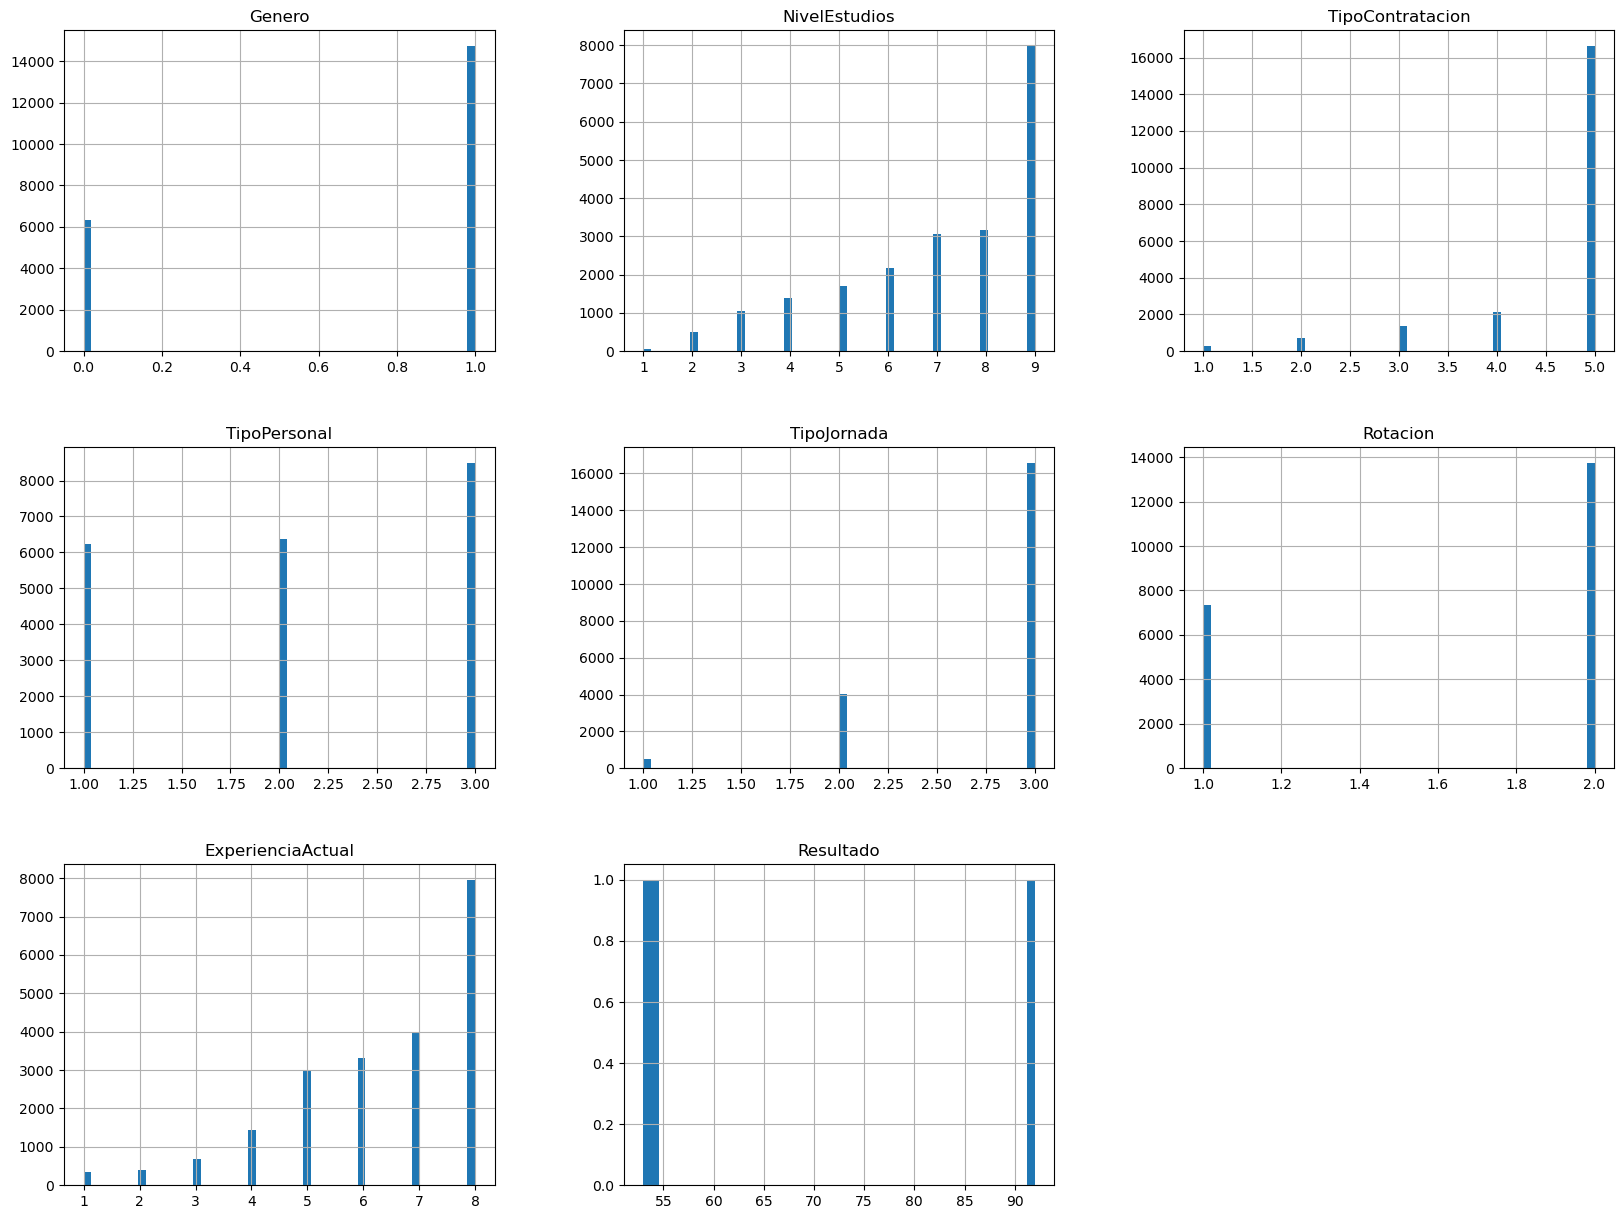

In [90]:
#Hacer un histograma de todas las variables numericas
df_e.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='Genero', ylabel='Genero'>,
        <AxesSubplot:xlabel='NivelEstudios', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoContratacion', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoPersonal', ylabel='Genero'>,
        <AxesSubplot:xlabel='TipoJornada', ylabel='Genero'>,
        <AxesSubplot:xlabel='Rotacion', ylabel='Genero'>,
        <AxesSubplot:xlabel='ExperienciaActual', ylabel='Genero'>],
       [<AxesSubplot:xlabel='Genero', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='NivelEstudios', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='TipoContratacion', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='TipoPersonal', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='TipoJornada', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='Rotacion', ylabel='NivelEstudios'>,
        <AxesSubplot:xlabel='ExperienciaActual', ylabel='NivelEstudios'>],
       [<AxesSubplot:xlabel='Genero', ylabel='TipoContratacion'>,
        <AxesSubp

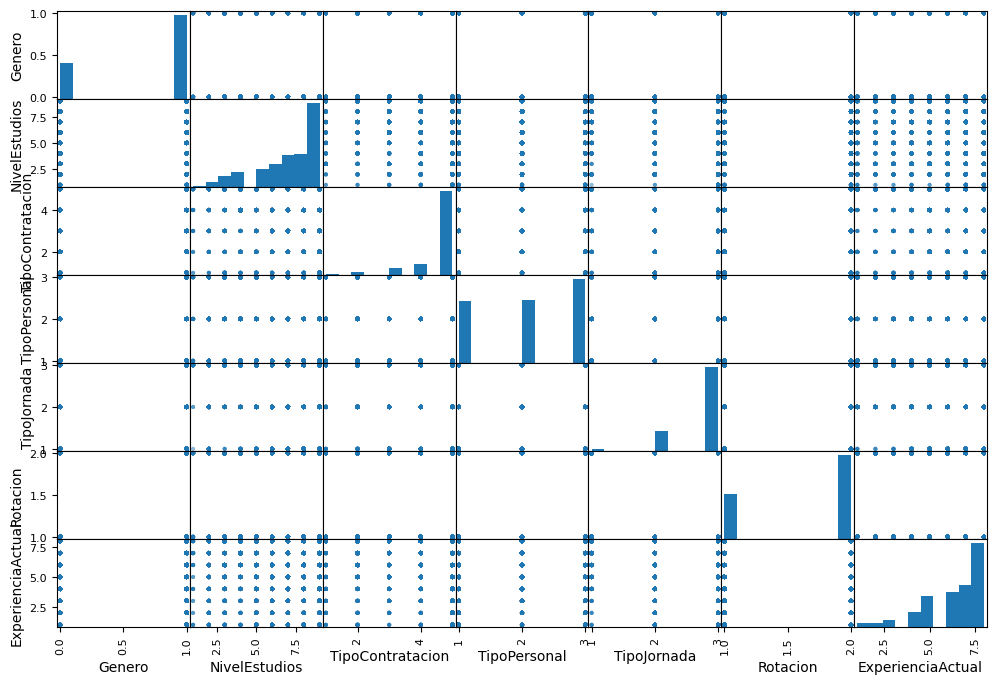

In [44]:
#Hacer diagramas de correlacion
from pandas.plotting import scatter_matrix
atributos = ['Genero','NivelEstudios','TipoContratacion','TipoPersonal','TipoJornada','Rotacion','ExperienciaActual']
scatter_matrix(df_e[atributos],figsize=(12,8))

# Coeficiente de correlación de Pearson

In [45]:
#Matriz correlacion numerica
df_e[atributos].corr(method='pearson').round(2)

,Genero,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
Genero,1.00,-0.07,0.03,-0.15,-0.11,-0.20,-0.05
NivelEstudios,-0.07,1.00,0.06,0.18,0.05,0.18,0.05
TipoContratacion,0.03,0.06,1.00,0.08,0.03,0.08,-0.02
TipoPersonal,-0.15,0.18,0.08,1.00,0.24,0.41,0.01
TipoJornada,-0.11,0.05,0.03,0.24,1.00,0.42,0.06
Rotacion,-0.20,0.18,0.08,0.41,0.42,1.00,0.01
ExperienciaActual,-0.05,0.05,-0.02,0.01,0.06,0.01,1.00


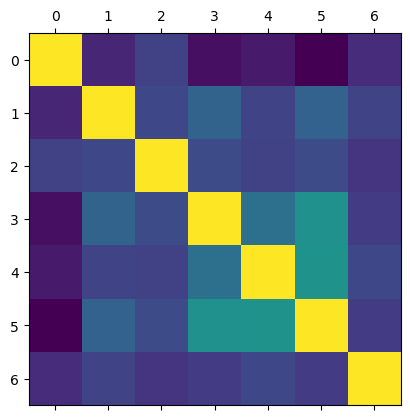

In [46]:
# Matriz correlacion visual
plt.matshow(df_e[atributos].corr())
plt.show()

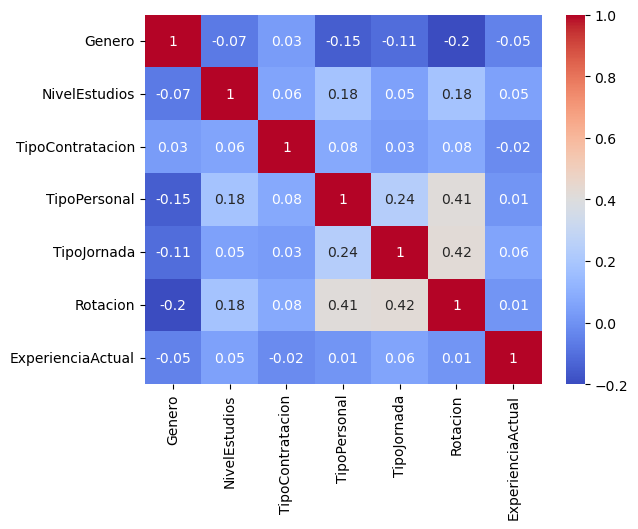

In [48]:
import seaborn as sn
corrMatrix = df_e[atributos].corr()
sn.heatmap(corrMatrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [50]:
#Falta 2 df, uno solo para determinar los resultados de las personas por las respuestas de las preguntas y el otro agregando esos resultados al df_e

# Preparar los datos para los algoritmos de Machine Learning

In [62]:
#Crear X (Quitar la columna "Genero"), en lugar de Genero tiene que ser la de los resultados por la prueba de la norm 035
X=df_e.drop('Genero',axis=1)
X

,NivelEstudios,TipoContratacion,TipoPersonal,TipoJornada,Rotacion,ExperienciaActual
25,3,5,1,3,1,8
26,9,5,1,3,2,8
27,4,4,1,3,1,7
28,9,5,2,3,1,6
29,9,2,3,3,2,3
...,...,...,...,...,...,...
21119,2,5,2,3,2,8
21120,8,5,2,3,2,5
21121,8,5,2,3,2,5
21122,7,5,2,3,2,7


In [63]:
#Crear y (valor de la columna "Genero") en lugar de Genero tiene que ser la de los resultados por la prueba de la norm 035
y=df_e['Genero']
y

25       1
26       1
27       1
28       1
29       0
        ..
21119    0
21120    0
21121    0
21122    0
21123    0
Name: Genero, Length: 21099, dtype: int64

In [56]:
#Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
#Revisar el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15824, 6), (5275, 6), (15824,), (5275,))

# Seleccionar un modelo y realizar el entrenamiento

Arbol de decision

In [58]:
# Modulos del Modelo: Arboles de decision
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [59]:
#Modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=17, max_depth=5, min_samples_leaf=5)

In [60]:
#Ajuste del modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=17)

In [61]:
#Prediccion
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
#Prueba en y_test
y_test.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
#Score
np.equal(y_pred, y_test.values)

array([False,  True,  True, ...,  True,  True,  True])

In [68]:
model.score(X_test, y_test)

0.7014218009478673

# Afinar el modelo

In [69]:
#Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,8,2):
    for i in range(1,8,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier(random_state=17, max_depth=i, min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precision:{ model.score(X_test, y_test) }')
        print('.....')

DecisionTreeClassifier(random_state=17, max_depth=i, min_samples_leaf=j)

Modelo con 1 max_depth, 1 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precision:0.7012322274881516
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precision:0.6945971563981043
.....
Modelo con 1 max_depth, 3 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 3 max_depth, 3 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 5 max_depth, 3 min_samples_leaf
Precision:0.7014218009478673
.....
Modelo con 7 max_depth, 3 min_samples_leaf
Precision:0.696303317535545
.....
Modelo con 1 max_depth, 5 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 3 max_depth, 5 min_samples_leaf
Precision:0.7000947867298578
.....
Modelo con 5 max_depth, 5 min_samples_leaf
Precision:0.7014218009478673
.....
Modelo con 7 max_depth, 5 min_samples_leaf
Precision:0.6964928909952607
.....
Modelo con 1 max_depth, 7 min_samples_leaf
Precision:0.7000947867

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, random_state=17)

# Seleccionar un modelo y realizar el entrenamiento

In [70]:
#Modulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
#Modelo
model2 = RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [73]:
#Ajuste del modelo
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [74]:
#Prediccion
y_pred2 = model2.predict(X_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
#Comparacion
np.equal(y_pred2, y_test.values)

array([ True,  True,  True, ...,  True,  True,  True])

In [76]:
#Score
model2.score(X_test, y_test)

0.7000947867298578

# Afinar el modelo

In [77]:
# RandomForestClassifier(random_state=17, max_depth=5, n_estimators=i )
for i in range (10,50,10):
    print(f'Modelo con n_estimators = {i}')
    model2=RandomForestClassifier(random_state=17, max_depth=5, n_estimators=i )
    model2.fit(X_train, y_train)
    print(f'Precision: {model2.score(X_test, y_test)}')
    print('.....')

Modelo con n_estimators = 10
Precision: 0.7000947867298578
.....
Modelo con n_estimators = 20
Precision: 0.7002843601895734
.....
Modelo con n_estimators = 30
Precision: 0.7002843601895734
.....
Modelo con n_estimators = 40
Precision: 0.7000947867298578
.....
